## Predict whether insurance companies should advertise insurance for an individual or not

The idea behind it is to train a machine leaning model and see according to the set of data that we have if someones will take the advertising offer or not.

I worked on the project to get handes on how to fit a machine leaning model for a set of data and to get familier to what a data scinetist will do in thier role.

In this project I have divided the data into to datasets:
1. Train to train the machine learning models contains
2. Test to test the accuracy for the models contains 

This data contains 1987 rows. And the attributes are:
1. Age
2. Employment Type
3. Graduate
4. Annual Income
5. Family Members
6. Chronic Diseases
7. Insurance

And finally I applied several different supervised machine learning techniques to this data set:
* Logistic Regression
* Decision tree
* Random forest
* KNN


## Importing

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/abdulrahman/Documents/Datasets/InsurancePrediction.csv')

In [7]:
df.head()

,Age,Employment Type,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,Insurance
0,31,Government Sector,Yes,400000,6,1,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,0


In [8]:
df.sample(15)

,Age,Employment Type,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,Insurance
1518,31,Private Sector/Self Employed,Yes,1250000,6,0,1
258,29,Private Sector/Self Employed,Yes,900000,7,0,0
826,28,Private Sector/Self Employed,Yes,1150000,3,0,0
1481,34,Private Sector/Self Employed,Yes,500000,6,0,1
1055,25,Private Sector/Self Employed,Yes,1700000,5,0,1
96,28,Private Sector/Self Employed,Yes,700000,4,0,0
1358,26,Private Sector/Self Employed,Yes,1500000,4,0,1
41,33,Private Sector/Self Employed,Yes,550000,5,0,0
1338,28,Private Sector/Self Employed,Yes,1450000,4,0,1
650,26,Private Sector/Self Employed,Yes,1400000,4,0,1


In [10]:
df.shape

(1987, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1987 non-null   int64 
 1   Employment Type  1987 non-null   object
 2   Graduate         1987 non-null   object
 3   AnnualIncome     1987 non-null   int64 
 4   FamilyMembers    1987 non-null   int64 
 5   ChronicDiseases  1987 non-null   int64 
 6   Insurance        1987 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 108.8+ KB


In [12]:
df.isna().sum()

Age                0
Employment Type    0
Graduate           0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
Insurance          0
dtype: int64

## Converting categorical features

In [13]:
df['Employment Type'].replace('Private Sector/Self Employed',1, inplace=True, regex= True)
df['Employment Type'].replace('Government Sector',0, inplace=True, regex= True)

df['Graduate'].replace('Yes',1, inplace=True, regex= True)
df['Graduate'].replace('No',0, inplace=True, regex= True)

In [14]:
df.sample(20)

,Age,Employment Type,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,Insurance
1103,34,1,1,1050000,5,1,0
798,34,0,1,1300000,5,1,1
1867,35,1,0,800000,5,0,1
528,25,1,0,1150000,5,0,0
618,31,1,1,1650000,2,0,1
1445,28,1,1,1100000,4,1,0
1030,34,1,1,1000000,3,1,0
10,31,0,1,400000,9,1,0
980,28,0,1,300000,8,0,0
59,33,1,1,1400000,9,0,1


In [15]:
df.describe()

,Age,Employment Type,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,Insurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000


## Data visualization

<AxesSubplot:xlabel='Insurance', ylabel='count'>

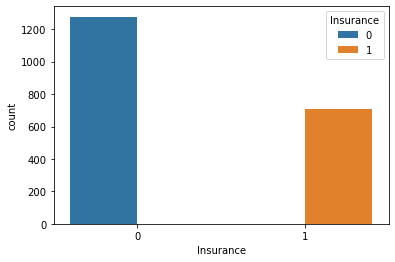

In [16]:
sns.countplot(x=df.Insurance, data=df, hue='Insurance')

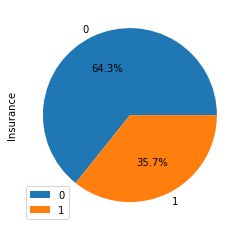

In [18]:
df['Insurance'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc=3)

## Building the models

##### Traine and test split for data

In [19]:
features = list(df[['Age','Employment Type','Graduate','AnnualIncome','FamilyMembers','ChronicDiseases']])
features

['Age',
 'Employment Type',
 'Graduate',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases']

In [20]:
y= df['Insurance']
x= df[features]

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.25,random_state=2)

In [22]:
xtrain.shape

(1490, 6)

In [23]:
ytrain.shape

(1490,)

In [24]:
xtest.shape

(497, 6)

In [25]:
ytest.shape

(497,)

In [26]:
print("Train Size: ", len(xtrain))
print("Test Size:  ", len(xtest))

Train Size:  1490
Test Size:   497


### Model training and predicting

### Logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(max_iter=3000)
LR= LR.fit(xtrain , ytrain) 

In [28]:
ypred = LR.predict(xtest)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[303,  16],
       [ 76, 102]])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       319
           1       0.86      0.57      0.69       178

    accuracy                           0.81       497
   macro avg       0.83      0.76      0.78       497
weighted avg       0.82      0.81      0.80       497



### Decision tree

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=2)
clf = clf.fit(xtrain,ytrain)

In [33]:
ypred = clf.predict(xtest)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[272,  47],
       [ 74, 104]])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       319
           1       0.69      0.58      0.63       178

    accuracy                           0.76       497
   macro avg       0.74      0.72      0.73       497
weighted avg       0.75      0.76      0.75       497



### Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=4)
clf2= clf2.fit(xtrain , ytrain)

In [37]:
ypred = clf2.predict(xtest)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[268,  51],
       [ 67, 111]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       319
           1       0.69      0.62      0.65       178

    accuracy                           0.76       497
   macro avg       0.74      0.73      0.74       497
weighted avg       0.76      0.76      0.76       497



### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [41]:
ypred = knn.predict(xtest)

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[303,  16],
       [ 76, 102]])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       319
           1       0.86      0.57      0.69       178

    accuracy                           0.81       497
   macro avg       0.83      0.76      0.78       497
weighted avg       0.82      0.81      0.80       497

